# Phillips Curve, NAIRU, and Natural Unemployment Rate

- First I will use SeaBorn, then attempt to use NixtlaVerse forecasting packages.

- StatsForecast: https://nixtla.github.io/statsforecast/

- MLForecast: https://github.com/nixtla/mlforecast

- NeuralForecast: https://github.com/nixtla/neuralforecast

- The data will explore inflation and unemployment

- In order to create a more individualized Phillip's Curve, I will be using data starting in the 80's to create the curve.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import math
import random
import seaborn as sns
import scipy

In [2]:
# Get data out of csv files and into the program
# Data till 2021
df_inflation = pd.read_csv("inflation.csv")

# df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")

# Data till 2021
df_unemployed = pd.read_csv("unemployment.csv")

# df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")

countries = ['Canada', 'China', 'France', 'United States']

In [3]:
df_unemployed

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.555645,6.707142,6.855589,6.940365,6.913046,7.121664,7.631303,7.920219,7.916831,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.470000,13.783000,13.407000,13.250000,13.076000,12.978000,13.575000,13.887000,13.590000,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.610000,22.870000,24.020000,23.990000,24.220000,25.540000,24.340000,28.770000,29.806000,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.133000,8.280000,8.393000,8.520000,5.030000,5.540000,6.030000,6.220000,6.131000,NaN


In [4]:
# Function to filter out every country that is not Canada (35), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

# Function for Countries excluding China

def getImportantContries2(dataframe):
    new_df = dataframe.iloc[[35, 77, 251]]
    return new_df

# Function for only China
def getChina(dataframe):
    new_df = dataframe.iloc[[40]]
    return new_df

In [14]:
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

def plot_ci_bootstrap(xs, ys, resid, nboot=500, ax=None):
    """Return an axes of confidence bands using a bootstrap approach.

    Notes
    -----
    The bootstrap approach iteratively resampling residuals.
    It plots `nboot` number of straight lines and outlines the shape of a band.
    The density of overlapping lines indicates improved confidence.

    Returns
    -------
    ax : axes
        - Cluster of lines
        - Upper and Lower bounds (high and low) (optional)  Note: sensitive to outliers

    References
    ----------
    .. [1] J. Stults. "Visualizing Confidence Intervals", Various Consequences.
       http://www.variousconsequences.com/2010/02/visualizing-confidence-intervals.html

    """ 
    if ax is None:
        ax = plt.gca()

    bootindex = sp.random.randint

    for _ in range(nboot):
        resamp_resid = resid[bootindex(0, len(resid) - 1, len(resid))]
        # Make coeffs of for polys
        pc = sp.polyfit(xs, ys + resamp_resid, 1)                   
        # Plot bootstrap cluster
        ax.plot(xs, sp.polyval(pc, xs), "b-", linewidth=2, alpha=3.0 / float(nboot))

    return ax

In [6]:
# Long Term Inflation Dataset
df_inflation1 = getImportantContries(df_inflation)
df_inflation1.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = dataframe_column_cutter(df_inflation1,-33,-1)
df_inflation1_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = df_inflation1_long_cut.T

# China Inflation Dataset
df_china = getChina(df_inflation)
df_china.index = ['China']
df_china_long_cut = dataframe_column_cutter(df_china,-28,-1)
df_china_long_cut.index = ['China']
df_china_long_cut = df_china_long_cut.T

# Canada, France, United States Inflation Dataset
df_inflation2 = getImportantContries2(df_inflation)
df_inflation2.index = ['Canada', 'France', 'United States']
df_inflation2_long_cut = dataframe_column_cutter(df_inflation2,-33,-1)
df_inflation2_long_cut.index = ['Canada', 'France', 'United States']
df_inflation2_long_cut = df_inflation2_long_cut.T

#########################################################################################################

# Long Term Unemployment Dataset
df_unemployed = getImportantContries(df_unemployed)
df_unemployed.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = dataframe_column_cutter(df_unemployed,-33,-1)
df_unemployed_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = df_unemployed_long_cut.T

In [7]:
# Test Code
df_unemployed_long_cut

,Canada,China,France,United States
1991,10.320,2.370,9.130,6.800
1992,11.200,2.370,10.200,7.500
1993,11.380,2.690,11.320,6.900
1994,10.400,2.900,12.590,6.120
1995,9.490,3.000,11.830,5.650
1996,9.620,3.120,12.370,5.450
1997,9.100,3.230,12.570,5.000
1998,8.280,3.240,12.070,4.510
1999,7.580,3.250,11.980,4.220
2000,6.830,3.260,10.220,3.990


In [8]:
# Extract x values (from 1991 to 2030)
lis = df_inflation1_long_cut.index
res = np.array([int(i) for i in lis])

# Extract x values (from 1991 to 2030), specifically for Canada, China, and United States
lis1 = df_inflation2_long_cut.index
res1 = np.array([int(i) for i in lis1])

# Extract x values (from 1996 to 2030), specifically for France
lis2 = df_china_long_cut.index
res2 = np.array([int(i) for i in lis2])

df_unemployed_long_cut

,Canada,China,France,United States
1991,10.320,2.370,9.130,6.800
1992,11.200,2.370,10.200,7.500
1993,11.380,2.690,11.320,6.900
1994,10.400,2.900,12.590,6.120
1995,9.490,3.000,11.830,5.650
1996,9.620,3.120,12.370,5.450
1997,9.100,3.230,12.570,5.000
1998,8.280,3.240,12.070,4.510
1999,7.580,3.250,11.980,4.220
2000,6.830,3.260,10.220,3.990


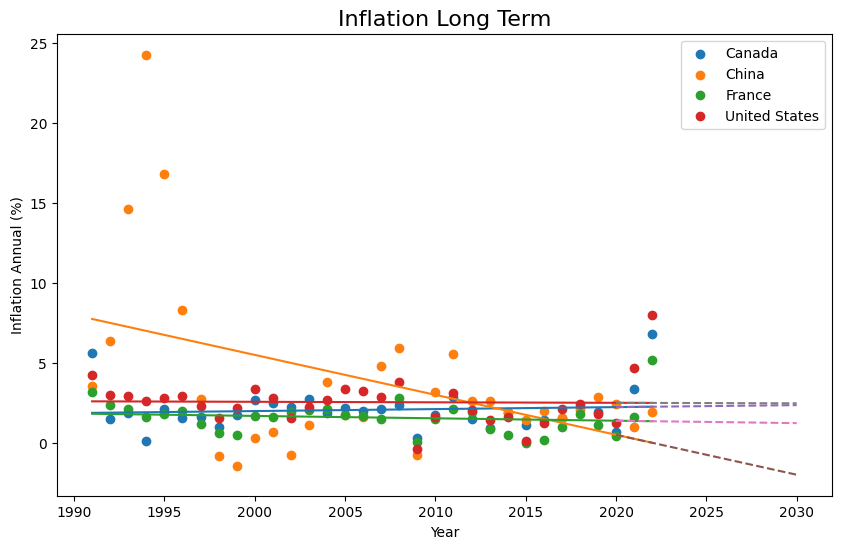

(array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]),
 array([2.250732  , 2.26307003, 2.27540807, 2.2877461 , 2.30008413,
        2.31242216, 2.32476019, 2.33709823, 2.34943626, 2.36177429,
        2.37411232]))

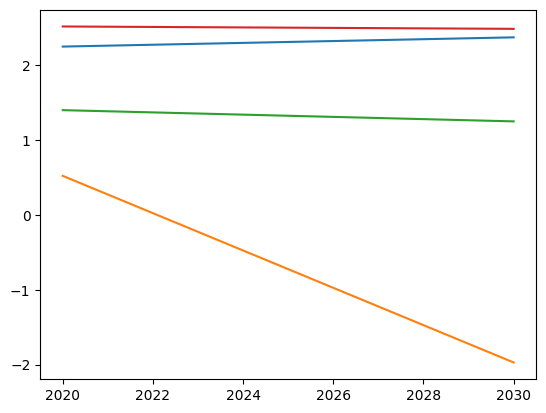

In [9]:
# For Inflation Long Term

x = res1
y_in = df_inflation1_long_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_in)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020,2031).reshape(-1,1)
pred_new = poly_reg_model.predict(poly.fit_transform(x_new))

error = 0.5 * pred_new

plt.figure(figsize=(10, 6))
plt.title("Inflation Long Term", size=16)
for data in countries:
    plt.scatter(x=res1, y=y_in[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)
# Will manually try to adjust colors to match up later
plt.plot(x_new, pred_new, linestyle='--')
# plt.errorbar((x_new, pred_new, yerr = error, fmt ='o')
plt.xlabel('Year')
plt.ylabel('Inflation Annual (%)')
plt.show()

lines = plt.plot(x_new, pred_new)
lines[0].get_data()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=8.42193e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.3015e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


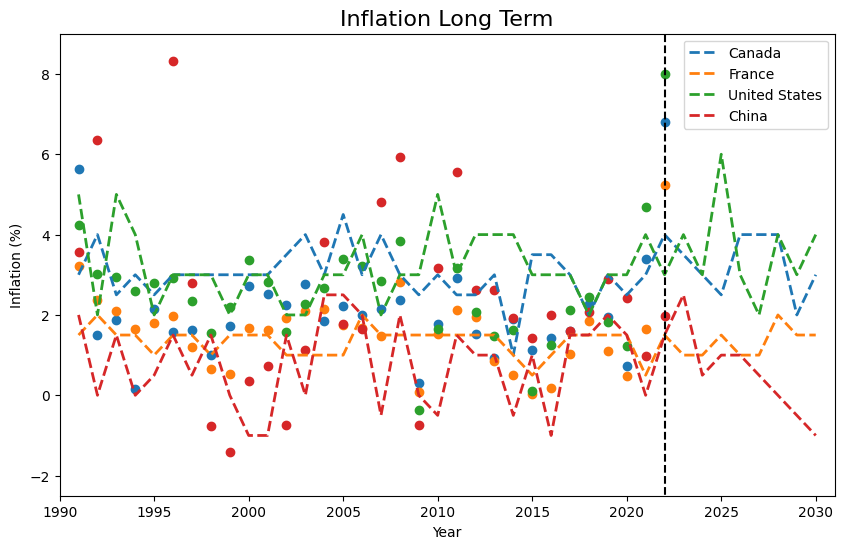

Canada's values: (array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025., 2026.,
       2027., 2028., 2029., 2030.]), array([3. , 4. , 2.5, 3. , 2.5, 3. , 3. , 3. , 3. , 3. , 3. , 3.5, 4. ,
       3. , 4.5, 3. , 4. , 3. , 2.5, 3. , 2.5, 2.5, 3. , 1. , 3.5, 3.5,
       3. , 2. , 3. , 2.5, 3. , 4. , 3.5, 3. , 2.5, 4. , 4. , 4. , 2. ,
       3. ]))
France's values: (array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025., 2026.,
       2027., 2028., 2029., 2030.]), array([1.5, 2. , 1.5, 1.5, 1. , 1.5, 1.5, 1. , 1.5, 1.5, 1.5, 1. , 1. ,
       1. , 1. , 2. , 1.5, 1

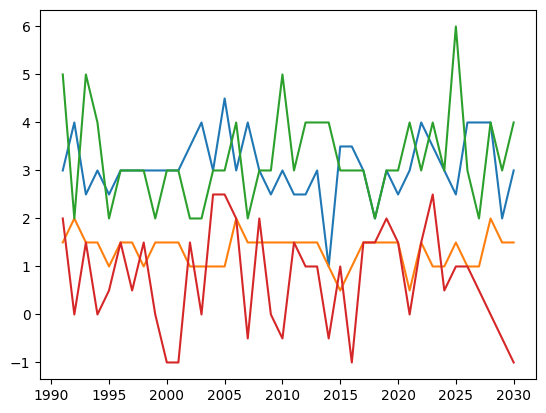

In [10]:
# For Inflation Long Term

# Extract x and y values for each set
# x and y values for Canada, France, United States
x1 = res1
y_in1 = df_inflation2_long_cut

# x and y values for China
x2 = res2
y_in2 = df_china_long_cut

# x and y values for all countries, needed for scatter plot
y_in = df_inflation1_long_cut

# Separate list of countries 
countries1 = ['Canada', 'France', 'United States']
countries2 = ['China']
countries3 = ['Canada', 'France', 'United States', 'China']

# Predicted x Values
x_pred = []
for i in range(1991,2031):
    a = (1/1)*i
    x_pred.append(a)

# Kernel Ridge Regression for Canada, France, and United States
poly_features1 = x1.reshape(-1, 1)
poly_reg_model1 = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model1.fit(poly_features1, y_in1)
y_predicted = poly_reg_model1.predict(poly_features1)

# Predicted values for Canada, France, and United States
x_new1 = np.array(x_pred).reshape(-1,1)
pred_new1 = poly_reg_model1.predict(x_new1)

# Kernel Ridge Regression for China
poly_features2 = x2.reshape(-1, 1)
poly_reg_model2 = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model2.fit(poly_features2, y_in2)
y_predicted = poly_reg_model2.predict(poly_features2)

# Predicted values for China
x_new2 = np.array(x_pred).reshape(-1,1)
pred_new2 = poly_reg_model2.predict(x_new2)

# Plot the values and the line
plt.figure(figsize=(10, 6))
plt.title("Inflation Long Term", size=16)
plt.plot(x_new1, pred_new1, linewidth=2, linestyle='--')
plt.plot(x_new2, pred_new2, linewidth=2, linestyle='--')
classes = countries3
plt.legend(labels=classes)
for data in countries3:
    plt.scatter(x=res, y=y_in[data])
# Create vertical line to distinguish future values
plt.axvline(x = 2022, ymin = -2.5, ymax = 9, color ='black', linestyle='--')
plt.xlim([1990, 2031])
plt.ylim([-2.5, 9])
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.show()

# Extract Data Points from regression lines
lines1 = plt.plot(x_new1, pred_new1)
lines2 = plt.plot(x_new2, pred_new2)
print("Canada's values: " + str(lines1[0].get_data()))
print("France's values: " + str(lines1[1].get_data()))
print("United States' values: " + str(lines1[2].get_data()))
print("China's values: " + str(lines2[0].get_data()))

In [ ]:
# Computations ----------------------------------------------------------------    
# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 


x = heights
y = weights
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

# Statistics
n = weights.size                                           # number of observations
m = p.size                                                 # number of parameters
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.975, n - m)                              # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Data
ax.plot(
    x, y, "o", color="#b9cfe7", markersize=8, 
    markeredgewidth=1, markeredgecolor="b", markerfacecolor="None"
)

# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5, label="Fit")  

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_bootstrap(x, y, resid, ax=ax)
   
# Prediction Interval
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color="0.5", label="95% Prediction Limits")
ax.plot(x2, y2 + pi, "--", color="0.5")

plt.show()

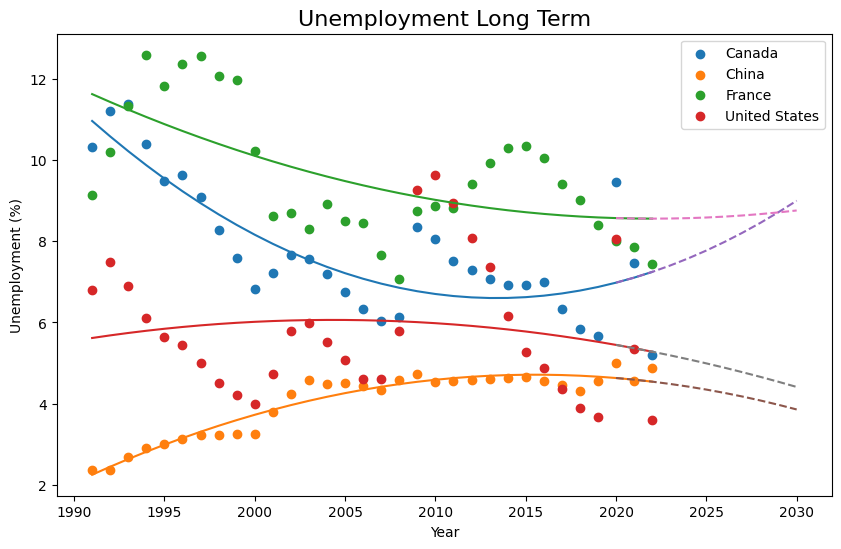

(array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]),
 array([6.9795193 , 7.1029943 , 7.24385043, 7.4020877 , 7.5777061 ,
        7.77070564, 7.98108631, 8.20884812, 8.45399106, 8.71651513,
        8.99642034]))

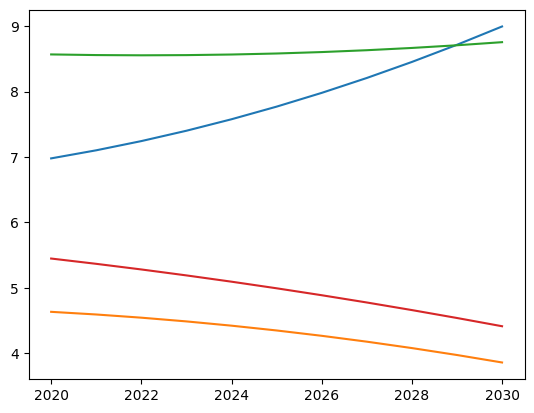

In [11]:
# For Unemployment Long Term

x = res1
y_em = df_unemployed_long_cut
countries = ['Canada', 'China', 'France', 'United States']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_em)
y_predicted = poly_reg_model.predict(poly_features)

x_new = np.arange(2020,2031).reshape(-1,1)
pred_new = poly_reg_model.predict(poly.fit_transform(x_new))

plt.figure(figsize=(10, 6))
plt.title("Unemployment Long Term", size=16)
for data in countries:
    plt.scatter(x=res1, y=y_em[data])
classes = countries
plt.legend(labels=classes)
plt.plot(x, y_predicted)
# Will manually try to adjust colors to match up
plt.plot(x_new, pred_new, linestyle='--')
plt.xlabel('Year')
plt.ylabel('Unemployment (%)')
plt.show()

lines = plt.plot(x_new, pred_new)
lines[0].get_data()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=8.42193e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
Canada Root Mean Squared Error: 1.3
China Root Mean Squared Error: 0.4
France Root Mean Squared Error: 1.5
US Root Mean Squared Error: 1.8


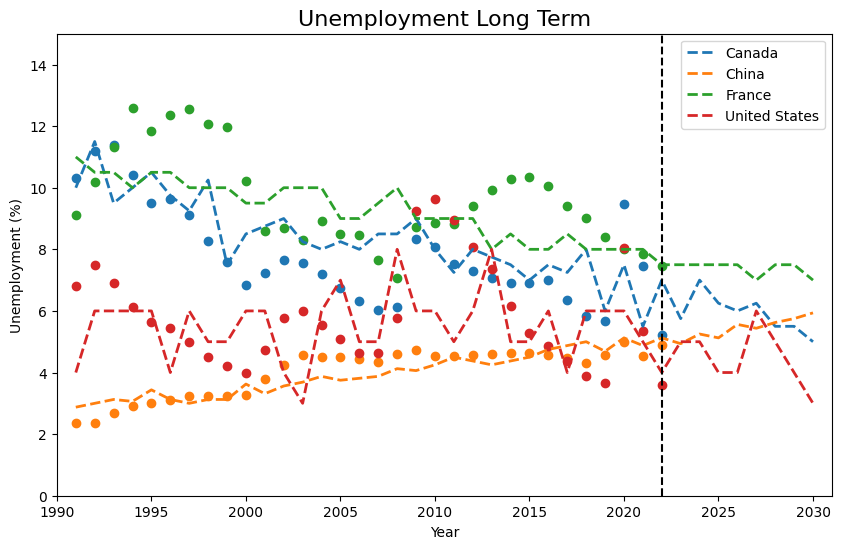

Canada's values: (array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030]), array([10.  , 11.5 ,  9.5 , 10.  , 10.5 ,  9.75,  9.25, 10.25,  7.5 ,
        8.5 ,  8.75,  9.  ,  8.25,  8.  ,  8.25,  8.  ,  8.5 ,  8.5 ,
        9.  ,  8.  ,  7.25,  8.  ,  7.75,  7.5 ,  7.  ,  7.5 ,  7.25,
        8.  ,  6.  ,  7.5 ,  5.5 ,  7.  ,  5.75,  7.  ,  6.25,  6.  ,
        6.25,  5.5 ,  5.5 ,  5.  ]))
China's values: (array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030]), array([2.875 , 3.    , 3.125 , 3.0625, 3.4375, 3.125 , 3.    , 3.125 ,
       3.125 , 3.625 , 3.3125, 3.5625

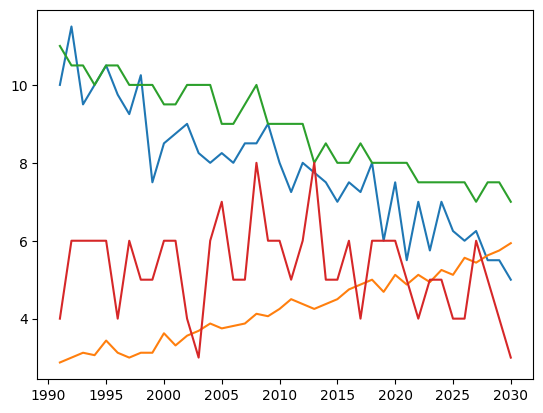

In [12]:
# For Unemployment Long Term

# Extract x and y values for each set
# x and y values for Canada, China, France, United States
x = res
y_em = df_unemployed_long_cut

# Predicted x Values
x_pred = []
for i in range(1991,2031):
    a = 1*i
    x_pred.append(a)

# Kernel Ridge Regression for Canada, China, France, and United States
poly_features = x.reshape(-1, 1)
poly_reg_model = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model.fit(poly_features, y_em)
y_predicted = poly_reg_model.predict(poly_features)

# Predicted values for Canada, China, France, and United States
x_new = np.array(x_pred).reshape(-1,1)
pred_new = poly_reg_model.predict(x_new)

# Establish datasets for RMSE
canada_set = pred_new[:32,0]
china_set = pred_new[:32,1]
france_set = pred_new[:32,2]
us_set = pred_new[:32,3]

# Individual RMSE for each country
rmse_canada = math.sqrt(mean_squared_error(canada_set, y_em['Canada']))
rmse_china = math.sqrt(mean_squared_error(china_set, y_em['China']))
rmse_france = math.sqrt(mean_squared_error(france_set, y_em['France']))
rmse_us = math.sqrt(mean_squared_error(us_set, y_em['United States']))

# Print RMSE values
print('Canada Root Mean Squared Error: %.1f' % rmse_canada)
print('China Root Mean Squared Error: %.1f' % rmse_china)
print('France Root Mean Squared Error: %.1f' % rmse_france)
print('US Root Mean Squared Error: %.1f' % rmse_us)

# Plot the values and the line
plt.figure(figsize=(10, 6))
plt.title("Unemployment Long Term", size=16)

plt.plot(x_new, pred_new, linewidth=2, linestyle='--')
classes = countries
plt.legend(labels=classes)
for data in countries:
    plt.scatter(x=res, y=y_em[data])
# Create vertical line to distinguish future values
plt.axvline(x = 2022, ymin = 0, ymax = 15, color ='black', linestyle='--')
plt.xlim([1990, 2031])
plt.ylim([0, 15])
plt.xlabel('Year')
plt.ylabel('Unemployment (%)')
plt.show()

# Extract Data Points from regression lines
lines = plt.plot(x_new, pred_new)
print("Canada's values: " + str(lines[0].get_data()))
print("China's values: " + str(lines[1].get_data()))
print("France's values: " + str(lines[2].get_data()))
print("United States' values: " + str(lines[3].get_data()))

<function matplotlib.pyplot.show(close=None, block=None)>

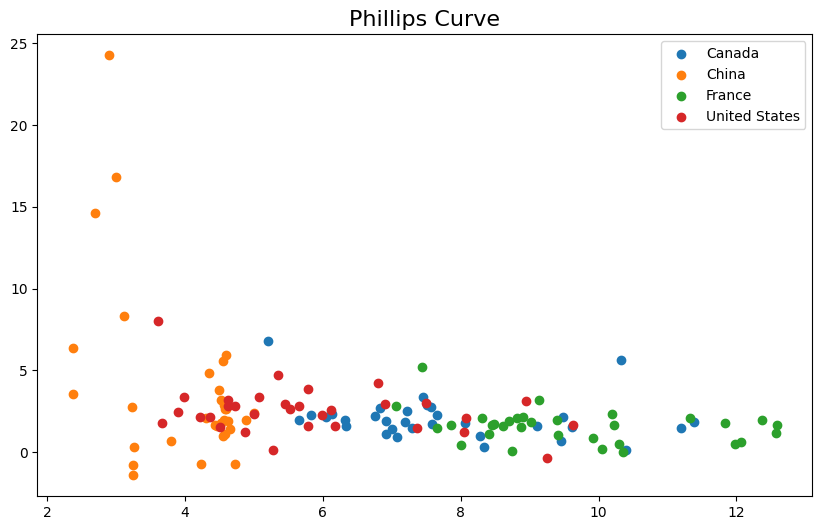

In [13]:
# Attempt to Make the Phillips Curve

plt.figure(figsize=(10, 6))
plt.title("Phillips Curve", size=16)
for data in countries:
    plt.scatter(x=y_em[data], y=y_in[data])
classes = countries
plt.legend(labels=classes)
plt.show

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>